In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-marks-dataset/Student_Marks.csv


IMPORT LIBRARY

In [2]:
import matplotlib.pyplot as plp
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


READ FILE

In [6]:
df = pd.read_csv('../input/student-marks-dataset/Student_Marks.csv')

In [7]:
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


CHECK FOR NULL

In [8]:
df.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

In [9]:
df.describe

<bound method NDFrame.describe of     number_courses  time_study   Marks
0                3       4.508  19.202
1                4       0.096   7.734
2                4       3.133  13.811
3                6       7.909  53.018
4                8       7.811  55.299
..             ...         ...     ...
95               6       3.561  19.128
96               3       0.301   5.609
97               4       7.163  41.444
98               7       0.309  12.027
99               3       6.335  32.357

[100 rows x 3 columns]>

CLASSIFY INDEPENDENT & DEPENDENT VARIABLES

In [17]:
X=df.drop(['Marks'],axis=1)
y=df['Marks']

TRAIN_TEST_SPLIT

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(X,y,test_size=.3, train_size=.7, random_state=240)

RANDOM FOREST REGRESSOR

In [34]:
from sklearn.ensemble import RandomForestRegressor


In [35]:
rf_model=RandomForestRegressor(n_estimators=100,random_state=80)
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)

In [41]:
from sklearn.metrics import r2_score

r21=r2_score(y_test,y_pred)
print('Accuracy of the random forest regressor model (R-Square value):',r21*100)

Accuracy of the random forest regressor model (R-Square value): 98.91826618677125


LIGHT GBM

In [39]:
import lightgbm as lgb

In [55]:
lgb_model=lgb.LGBMRegressor(n_estimators=100,random_state=80)

In [67]:
x_train, x_test, y_train, y_test  = train_test_split(X,y,test_size=.3, train_size=.7, random_state=240)
parameters = {
    'num_leaves': 31,
    'learning_rate': 0.01,
    'verbose':-1
}
Ds=lgb.Dataset(x_train,label=y_train)
lgb_model=lgb.train(parameters,Ds,num_boost_round=100)
y_pred=lgb_model.predict(x_test)

In [57]:
r22=r2_score(y_test,y_pred)
print('Accuracy of the LGBM model (R-Square value):',r22*100)

Accuracy of the LGBM model (R-Square value): 95.25800780236267


CAT BOOST

In [58]:
import catboost as cb

In [85]:
cb_model = cb.CatBoostRegressor(iterations=100,  
                              learning_rate=0.05,
                              verbose=0) 
cb_model.fit(x_train, y_train)

In [128]:
y_pred=cb_model.predict(x_test)

In [129]:
r23=r2_score(y_test,y_pred)
print('Accuracy of the CAT BOOST model (R-Square value):',r23*100)

Accuracy of the CAT BOOST model (R-Square value): 99.29732453956723


GRADIENT BOOST

In [105]:
from sklearn.ensemble import GradientBoostingRegressor

In [111]:
gb_model = GradientBoostingRegressor(n_estimators=100,
                                   learning_rate=0.05,  
                                   max_depth=6     
                                   )

In [113]:
gb_model.fit(x_train,y_train)
y_pred =gb_model.predict(x_test)

In [114]:
r24=r2_score(y_test,y_pred)
print('Accuracy of the GRADIENT BOOSTregressor model (R-Square value):',r24*100)

Accuracy of the random forest regressor model (R-Square value): 98.52419889395661


XGB

In [115]:
import xgboost as xgb

In [117]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

In [120]:
params = {
    'max_depth': 6,
    'learning_rate': 0.01,          
}

In [124]:
XGB_model = xgb.train(params, dtrain, num_boost_round=100)

In [126]:
y_pred= XGB_model.predict(dtest)


In [130]:
r25=r2_score(y_test,y_pred)
print('Accuracy of the XGB model (R-Square value):',r25*100)

Accuracy of the XGB model (R-Square value): 99.29732453956723


In [131]:
data = {
    'Algorithms': [
        'RandomForestClassifier',
        'LGBM',
        'Cat boost',
        'Gradient boost',
        'XGB'
    ],
    'Accuracy': [
        r21,
        r22,
        r23,
        r24,
        r25]
}

output = pd.DataFrame(data, columns=['Algorithms', 'Accuracy'],index=[1,2,3,4,5])
print(output)

               Algorithms  Accuracy
1  RandomForestClassifier  0.989183
2                    LGBM  0.952580
3               Cat boost  0.992973
4          Gradient boost  0.985242
5                     XGB  0.992973


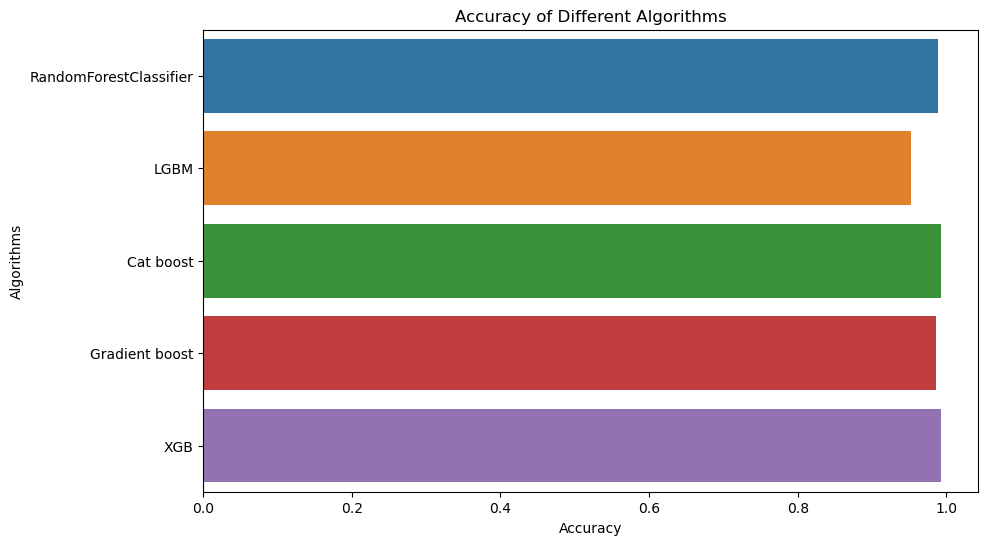

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Algorithms', data=output)

plt.xlabel('Accuracy')
plt.ylabel('Algorithms')
plt.title('Accuracy of Different Algorithms')
plt.show()